# batch_size 对训练效果的影响

In [16]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn
import time
import matplotlib.pyplot as plt

In [17]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(device)

cuda


## Define Model

In [18]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
        pass

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    pass

## Data Loader

In [19]:
def data_loader(batch_size: int):
    training_data = datasets.FashionMNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor()
    )

    testing_data = datasets.FashionMNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor()
    )

    batch_size = batch_size

    train_dataloader = DataLoader(training_data, batch_size=batch_size)
    test_dataloader = DataLoader(testing_data, batch_size=batch_size)
    return train_dataloader, test_dataloader

## Train & Test

In [20]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch+1)*len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            pass
        pass
    pass


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            pass
        pass
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

## Main

In [21]:
epoches = 30
learning_rate = 1e-3

model = MyModel().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### batch_size = 5

In [22]:
batch_size = 5

train_dataloader, test_dataloader = data_loader(batch_size)
corrects_5 = []
test_losses_5 = []
times_5 = []
for t in range(epoches):
    print(f"Epoch {t+1}\n------------------------------")
    start = time.time()
    train(train_dataloader, model, loss_fn, optimizer)
    end = time.time()
    correct, test_loss = test(test_dataloader, model, loss_fn)
    corrects_5.append(correct)
    test_losses_5.append(test_loss)
    times_5.append(end - start)
    print(f"time: {end - start}\n")
    pass
print("done")

Epoch 1
------------------------------
loss: 2.333284  [    5/60000]
loss: 2.317782  [  505/60000]
loss: 2.260652  [ 1005/60000]
loss: 2.200168  [ 1505/60000]
loss: 2.239794  [ 2005/60000]
loss: 2.229897  [ 2505/60000]
loss: 2.226673  [ 3005/60000]
loss: 2.200083  [ 3505/60000]
loss: 2.153225  [ 4005/60000]
loss: 2.234951  [ 4505/60000]
loss: 2.106346  [ 5005/60000]
loss: 2.186150  [ 5505/60000]
loss: 2.119397  [ 6005/60000]
loss: 2.053933  [ 6505/60000]
loss: 2.050398  [ 7005/60000]
loss: 1.959623  [ 7505/60000]
loss: 2.030324  [ 8005/60000]
loss: 1.923928  [ 8505/60000]
loss: 1.957605  [ 9005/60000]
loss: 1.875095  [ 9505/60000]
loss: 1.912050  [10005/60000]
loss: 1.636605  [10505/60000]
loss: 1.814382  [11005/60000]
loss: 1.758196  [11505/60000]
loss: 1.630694  [12005/60000]
loss: 1.657760  [12505/60000]
loss: 1.727346  [13005/60000]
loss: 1.878179  [13505/60000]
loss: 1.384589  [14005/60000]
loss: 1.647344  [14505/60000]
loss: 1.210850  [15005/60000]
loss: 1.146078  [15505/60000]
l

### batch_size = 20

In [23]:
batch_size = 20

train_dataloader, test_dataloader = data_loader(batch_size)
corrects_20 = []
test_losses_20 = []
times_20 = []
for t in range(epoches):
    print(f"Epoch {t+1}\n------------------------------")
    start = time.time()
    train(train_dataloader, model, loss_fn, optimizer)
    end = time.time()
    correct, test_loss = test(test_dataloader, model, loss_fn)
    corrects_20.append(correct)
    test_losses_20.append(test_loss)
    times_20.append(end - start)
    print(f"time: {end - start}\n")
    pass
print("done")

Epoch 1
------------------------------
loss: 0.226834  [   20/60000]
loss: 0.351985  [ 2020/60000]
loss: 0.102212  [ 4020/60000]
loss: 0.296886  [ 6020/60000]
loss: 0.539414  [ 8020/60000]
loss: 0.152822  [10020/60000]
loss: 0.222950  [12020/60000]
loss: 0.322720  [14020/60000]
loss: 0.628707  [16020/60000]
loss: 0.566850  [18020/60000]
loss: 0.105648  [20020/60000]
loss: 0.418441  [22020/60000]
loss: 0.369168  [24020/60000]
loss: 0.175896  [26020/60000]
loss: 0.537115  [28020/60000]
loss: 0.108882  [30020/60000]
loss: 0.277522  [32020/60000]
loss: 0.350206  [34020/60000]
loss: 0.192821  [36020/60000]
loss: 0.318066  [38020/60000]
loss: 0.492271  [40020/60000]
loss: 0.781828  [42020/60000]
loss: 0.132923  [44020/60000]
loss: 0.370903  [46020/60000]
loss: 0.299779  [48020/60000]
loss: 0.502511  [50020/60000]
loss: 0.079573  [52020/60000]
loss: 0.237841  [54020/60000]
loss: 0.125919  [56020/60000]
loss: 0.318971  [58020/60000]
Test Error: 
 Accuracy: 87.9%, Avg loss: 0.341361 

time: 12.

### batch_size = 100

In [24]:
batch_size = 100

train_dataloader, test_dataloader = data_loader(batch_size)
corrects_100 = []
test_losses_100 = []
times_100 = []
for t in range(epoches):
    print(f"Epoch {t+1}\n------------------------------")
    start = time.time()
    train(train_dataloader, model, loss_fn, optimizer)
    end = time.time()
    correct, test_loss = test(test_dataloader, model, loss_fn)
    corrects_100.append(correct)
    test_losses_100.append(test_loss)
    times_100.append(end - start)
    print(f"time: {end - start}\n")
    pass
print("done")

Epoch 1
------------------------------
loss: 0.150453  [  100/60000]
loss: 0.185180  [10100/60000]
loss: 0.214507  [20100/60000]
loss: 0.229687  [30100/60000]
loss: 0.394429  [40100/60000]
loss: 0.300083  [50100/60000]
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.324944 

time: 8.053825616836548

Epoch 2
------------------------------
loss: 0.149372  [  100/60000]
loss: 0.183379  [10100/60000]
loss: 0.212708  [20100/60000]
loss: 0.230168  [30100/60000]
loss: 0.394031  [40100/60000]
loss: 0.299465  [50100/60000]
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.324921 

time: 7.821741104125977

Epoch 3
------------------------------
loss: 0.149071  [  100/60000]
loss: 0.182888  [10100/60000]
loss: 0.212013  [20100/60000]
loss: 0.230187  [30100/60000]
loss: 0.393752  [40100/60000]
loss: 0.298862  [50100/60000]
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.324884 

time: 7.439795255661011

Epoch 4
------------------------------
loss: 0.149008  [  100/60000]
loss: 0.182638  [10100/60000]
loss: 0.21168

### batch_size = 10000

In [25]:
batch_size = 10000

train_dataloader, test_dataloader = data_loader(batch_size)
corrects_10000 = []
test_losses_10000 = []
times_10000 = []
for t in range(epoches):
    print(f"Epoch {t+1}\n------------------------------")
    start = time.time()
    train(train_dataloader, model, loss_fn, optimizer)
    end = time.time()
    correct, test_loss = test(test_dataloader, model, loss_fn)
    corrects_10000.append(correct)
    test_losses_10000.append(test_loss)
    times_10000.append(end - start)
    print(f"time: {end - start}\n")
    pass
print("done")

Epoch 1
------------------------------
loss: 0.228430  [10000/60000]
Test Error: 
 Accuracy: 88.5%, Avg loss: 0.322832 

time: 7.087778568267822

Epoch 2
------------------------------
loss: 0.228014  [10000/60000]
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.322716 

time: 7.126408100128174

Epoch 3
------------------------------
loss: 0.227758  [10000/60000]
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.322651 

time: 6.542964696884155

Epoch 4
------------------------------
loss: 0.227580  [10000/60000]
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.322609 

time: 7.1930670738220215

Epoch 5
------------------------------
loss: 0.227447  [10000/60000]
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.322581 

time: 7.030933141708374

Epoch 6
------------------------------
loss: 0.227344  [10000/60000]
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.322560 

time: 6.413153648376465

Epoch 7
------------------------------
loss: 0.227261  [10000/60000]
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.322545 

ti

准确率结果

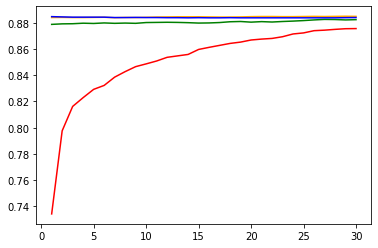

In [26]:
fig_acc, ax_acc = plt.subplots()
ax_acc.plot(range(1, epoches+1), corrects_5, c='red')
ax_acc.plot(range(1, epoches+1), corrects_20, c='green')
ax_acc.plot(range(1, epoches+1), corrects_100, c='orange')
ax_acc.plot(range(1, epoches+1), corrects_10000, c='blue')
fig_acc.show()

loss 结果

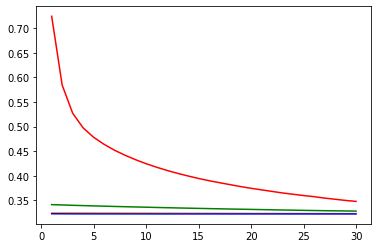

In [27]:
fig_loss, ax_loss = plt.subplots()
ax_loss.plot(range(1, epoches+1), test_losses_5, c='red')
ax_loss.plot(range(1, epoches+1), test_losses_20, c='green')
ax_loss.plot(range(1, epoches+1), test_losses_100, c='orange')
ax_loss.plot(range(1, epoches+1), test_losses_10000, c='blue')
fig_loss.show()

每个epoch用时结果

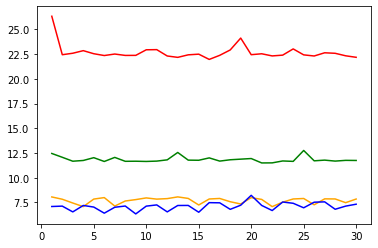

In [28]:
fig_time, ax_time = plt.subplots()
ax_time.plot(range(1, epoches+1), times_5, c='red')
ax_time.plot(range(1, epoches+1), times_20, c='green')
ax_time.plot(range(1, epoches+1), times_100, c='orange')
ax_time.plot(range(1, epoches+1), times_10000, c='blue')
fig_time.show()